# Figures

In [1]:
from fbm import FBM #fractional signals
import matplotlib.pyplot as plt #plotting
import matplotlib.lines as lines #draw lines
from matplotlib.patches import Polygon
import numpy as np #numbers
from sklearn.linear_model import LinearRegression #perform linear regression
from scipy import signal #create signals
import string #for latex
import warnings
warnings.filterwarnings("ignore")

## Sierpinksi Triangle

In [2]:
def sierpinski_triangle(level, p1, p2, p3):
    """Generate the triangles for a Sierpinski triangle at the given iteration level."""
    if level == 0:
        return [np.array([p1, p2, p3])]
    
    # Calculate midpoints
    mid1 = (p1 + p2) / 2
    mid2 = (p2 + p3) / 2
    mid3 = (p3 + p1) / 2
    
    # Recursively generate triangles for each sub-triangle
    triangles = []
    triangles.extend(sierpinski_triangle(level-1, p1, mid1, mid3))
    triangles.extend(sierpinski_triangle(level-1, mid1, p2, mid2))
    triangles.extend(sierpinski_triangle(level-1, mid3, mid2, p3))
    
    return triangles

def plot_sierpinski(ax, level):
    """Plot a Sierpinski triangle on the given axes."""
    # Define the initial triangle points
    height = np.sqrt(3) / 2
    p1 = np.array([0, 0])
    p2 = np.array([1, 0])
    p3 = np.array([0.5, height])
    
    if level == 0:
        # For level 0, just plot the single triangle
        triangles = [np.array([p1, p2, p3])]
    else:
        # For level > 0, generate the Sierpinski triangles
        triangles = sierpinski_triangle(level, p1, p2, p3)
    
    # Create and add polygon patches to the axes
    for triangle in triangles:
        # The Polygon constructor takes the vertices as its first argument
        polygon = Polygon(triangle, closed=True, edgecolor='k', facecolor='cornflowerblue', linewidth=0.5)
        ax.add_patch(polygon)
    
    # Set limits and title
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, height + 0.1])
    ax.set_aspect('equal')
    ax.set_axis_off()

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Level 0: Simple triangle
plot_sierpinski(axes[0], 0)

# Level 1: First Sierpinski iteration
plot_sierpinski(axes[1], 1)

# Level 5: Fifth Sierpinski iteration
plot_sierpinski(axes[2], 5)

plt.tight_layout()
plt.savefig('../image/sierpinkski.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

## Exact vs Statistical Fractal

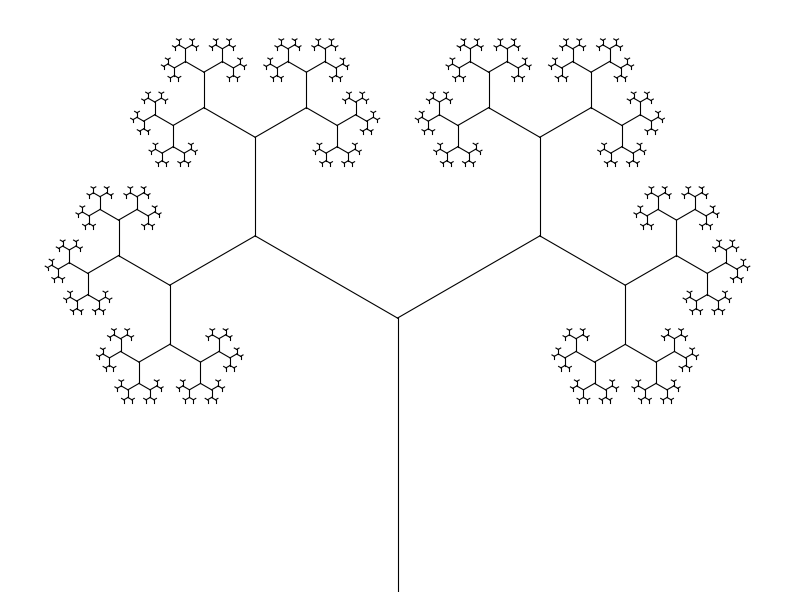

In [3]:
def draw_fractal_tree(ax, x, y, length, angle, depth):
    """
    Draw a self-similar fractal tree.
    
    Parameters:
    - ax: Matplotlib axis
    - x, y: Starting coordinates
    - length: Branch length
    - angle: Angle in radians
    - depth: Recursion depth
    """
    if depth == 0:
        return
    
    # Calculate endpoint using trigonometry
    x2 = x + length * np.sin(angle)
    y2 = y + length * np.cos(angle)
    
    # Draw the branch
    ax.plot([x, x2], [y, y2], 'k-', linewidth=0.8)
    
    # Left branch
    left_angle = angle + np.pi/3
    # Right branch
    right_angle = angle - np.pi/3
    
    # Reduce length for next branches
    new_length = length * 0.6
    
    # Recursively draw the branches
    draw_fractal_tree(ax, x2, y2, new_length, left_angle, depth-1)
    draw_fractal_tree(ax, x2, y2, new_length, right_angle, depth-1)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Configure the axis
#ax.set_xlim(-5, 5)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.axis('off')

# Draw the tree starting from the bottom center
# with initial upward direction (angle = 0)
draw_fractal_tree(ax, 0, 0, 4.7, 0, 10)

# Ensure tight layout
#plt.tight_layout()
plt.savefig('../image/fractal_tree.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

## Four Properties of Fractal Signals

In [4]:
plt.rcParams['text.usetex'] = True #latex

np.random.seed(4)
scale1=1024
scale2=512
scale3=256

fp7 = FBM(scale1, hurst=0.8, length=1, method='daviesharte')
fgnp7 = fp7.fgn()*100

fig, ax = plt.subplots(3,2, constrained_layout=True, figsize=(8,8))
ax[0][0].plot(fgnp7)
ax[0][0].axvline(x=scale2, color='red', linestyle='--')
ax[0][0].axvline(x=0, color='red', linestyle='--')
ax[0][0].set_title("Raw time-series", loc='left')

ax[1][0].plot(fgnp7[:scale2])
ax[1][0].axvline(x=scale3, color='red', linestyle='--')
ax[1][0].axvline(x=0, color='red', linestyle='--')
ax[1][0].set_ylabel('Signal Amplitude')
ax[1][0].set_title("Half of segment of A", loc='left')

ax[2][0].plot(fgnp7[:scale3])
ax[2][0].set_xlabel('Time')
ax[2][0].set_title("Half of segment of B", loc='left')

freq, power = signal.periodogram(fgnp7, 1)
power = power[1:]
freq = freq[1:]

log_power = np.log10(power)
log_freq = np.log10(freq)
log_power = log_power[1:]
log_freq = log_freq[1:]

model = LinearRegression().fit(log_freq.reshape(-1,1), log_power)
predicted_power = 10**model.predict(log_freq.reshape(-1,1))
Hurst = (model.coef_*-1+1)/2

ax[0][1].plot(freq.reshape(-1,1), power)
ax[0][1].set_title("Power spectral density of A", loc='left')

ax[1][1].plot(freq.reshape(-1,1), power)
ax[1][1].set_xscale('log')
ax[1][1].set_yscale('log')
ax[1][1].plot(freq[1:].reshape(-1,1), predicted_power, color='red')
ax[1][1].text(0.002, .01, r"$\beta=0.6$", color="r", fontsize=14)
ax[1][1].text(0.002, .002, r"$H=0.8$", color="r", fontsize=14)
ax[1][1].set_title("Log-log plot of D", loc='left')
ax[1][1].set_xlabel(r"Frequency ($f$)")
ax[1][1].set_ylabel(r"Amplitude ($|A(f)|^{2}$)")

newpower=power
fp5 = FBM(scale1, hurst=0.5, length=1, method='daviesharte')
fgnp5 = fp5.fgn()*5
p5freq, p5power = signal.periodogram(fgnp5, 1)
p5power=p5power - np.mean(p5power) + predicted_power[-1]*1.4
newpower[:10]= (np.random.rand(10)+0.5) # 10 was the power value around the low frequency
newpower[312:]=p5power[312:512]
ax[2][1].plot(freq.reshape(-1,1), newpower)
ax[2][1].plot(freq[1:].reshape(-1,1)[10:312], predicted_power[10:312], color='red')
ax[2][1].axvline(x=freq[10], color='red', linestyle='--')
ax[2][1].axvline(x=freq[312], color='red', linestyle='--')
ax[2][1].set_xscale('log')
ax[2][1].set_yscale('log')
ax[2][1].set_xlabel(r"Frequency ($f$)")
ax[2][1].set_title("E but with a scaling range", loc='left')

text = r"$\log_{10} \left( \frac{f_{max} - f_{min}}{f_s} \right)$"
text_xy = (freq[10]*1.7, 0.001)
ax[2][1].annotate(text, (freq[10],0.001), text_xy, arrowprops={"arrowstyle": "->", "color": "red"}, color="red")
ax[2][1].annotate(text, (freq[312],0.001), text_xy, arrowprops={"arrowstyle": "->", "color": "red"}, color="red")

for i in range(3):
    ax[i, 0].text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax[i, 0].transAxes, 
                  size=13, weight='bold')
    ax[i, 1].text(-0.1, 1.1, string.ascii_uppercase[i+3], transform=ax[i, 1].transAxes, 
                  size=13, weight='bold')

plt.savefig('../image/fourproperties.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

## Typical Sample Paths

In [19]:
np.random.seed(1)
plt.rcParams['text.usetex'] = True #latex

def psd(timeseries):
    freq, power = signal.periodogram(timeseries, 1)
    power = power[1:]
    freq = freq[1:]

    log_power = np.log10(power)
    log_freq = np.log10(freq)
    log_power = log_power[1:]
    log_freq = log_freq[1:]

    model = LinearRegression()
    model.fit(log_freq.reshape(-1,1), log_power)
    predicted_power = 10**model.predict(log_freq.reshape(-1,1))

    return freq.reshape(-1,1), power, predicted_power

fp5 = FBM(1024, hurst=0.5, length=1, method='daviesharte')
fp1 = FBM(1024, hurst=0.1, length=1, method='daviesharte')
fp9 = FBM(1024, hurst=0.9, length=1, method='daviesharte')
fgnp5 = fp5.fgn()
fgnp1 = fp1.fgn()
fgnp9 = fp9.fgn()
fbmp5 = fp5.fbm()
fbmp1 = fp1.fbm()
fbmp9 = fp9.fbm()

fig, ax = plt.subplots(6,2, figsize=(10,7))
fig.subplots_adjust(wspace=0.25)
ax[0,0].plot(fgnp1)
ax[0,0].set_title("Time Series")
ax[0,0].xaxis.set_visible(False)
ax[0,0].set_ylabel("0.1", rotation=0, labelpad=12)
ax[0,0].text(1.05, 0.55, "-0.8", rotation=0,
             transform=ax[0,0].transAxes, color='red')
ax[0,0].set_yticks([])
ax[1,0].plot(fgnp5)
ax[1,0].xaxis.set_visible(False)
ax[1,0].set_yticks([])
ax[1,0].set_ylabel("0.5", rotation=0, labelpad=12)
ax[1,0].text(1.08, 0.55, "0", rotation=0,
             transform=ax[1,0].transAxes, color='red')
ax[2,0].plot(fgnp9)
ax[2,0].xaxis.set_visible(False)
ax[2,0].set_yticks([])
ax[2,0].set_ylabel("0.9", rotation=0, labelpad=12)
ax[2,0].text(1.06, 0.55, "0.8", rotation=0,
             transform=ax[2,0].transAxes, color='red')
ax[3,0].plot(fbmp1)
ax[3,0].xaxis.set_visible(False)
ax[3,0].set_yticks([])
ax[3,0].set_ylabel("0.1", rotation=0, labelpad=12)
ax[3,0].text(1.06, 0.55, "1.2", rotation=0,
             transform=ax[3,0].transAxes, color='red')
ax[4,0].plot(fbmp5)
ax[4,0].xaxis.set_visible(False)
ax[4,0].set_yticks([])
ax[4,0].set_ylabel("0.5", rotation=0, labelpad=12)
ax[4,0].text(1.08, 0.55, "2", rotation=0,
             transform=ax[4,0].transAxes, color='red')
ax[5,0].plot(fbmp9)
ax[5,0].set_yticks([])
ax[5,0].set_ylabel("0.9", rotation=0, labelpad=12)
ax[5,0].set_xlabel("Time")
ax[5,0].text(1.06, 0.55, "2.8", rotation=0,
             transform=ax[5,0].transAxes, color='red')

line = lines.Line2D([0.1, 1.05], [0.495, 0.495], transform=fig.transFigure, color='black', linewidth=1)
fig.add_artist(line)
fig.text(1, 0.705, r"$H=\frac{\beta+1}{2}$", ha='center', va='center', fontsize=18, transform=fig.transFigure)
fig.text(1, 0.305, r"$H=\frac{\beta-1}{2}$", ha='center', va='center', fontsize=18, transform=fig.transFigure)

fig.text(0.11, .9, r"H", fontsize=14, ha='center', va='center', transform=fig.transFigure)
fig.text(0.5, .9, r"$\beta$", fontsize=14, ha='center', va='center', transform=fig.transFigure, color='red')

freq,power,pred_power = psd(fgnp1)
ax[0,1].plot(freq,power)
ax[0,1].set_title("Power Spectral Density")
ax[0,1].plot(freq[1:], pred_power, color='red')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.tick_right()
ax[0,1].set_ylim(1e-4,10)

freq,power,pred_power = psd(fgnp5)
ax[1,1].plot(freq,power)
ax[1,1].plot(freq[1:], pred_power, color='red')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylabel(r"$\log|A(f)|^2$")
ax[1,1].set_ylim(1e-5,1e-2)

freq,power,pred_power = psd(fgnp9)
ax[2,1].plot(freq,power)
ax[2,1].plot(freq[1:], pred_power, color='red')
ax[2,1].set_xscale('log')
ax[2,1].set_yscale('log')
ax[2,1].xaxis.set_visible(False)
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylim(1e-9,1e-2)

freq,power,pred_power = psd(fbmp1)
ax[3,1].plot(freq,power)
ax[3,1].plot(freq[1:], pred_power, color='red')
ax[3,1].set_xscale('log')
ax[3,1].set_yscale('log')
ax[3,1].xaxis.set_visible(False)
ax[3,1].yaxis.tick_right()

freq,power,pred_power = psd(fbmp5)
ax[4,1].plot(freq,power)
ax[4,1].plot(freq[1:], pred_power, color='red')
ax[4,1].set_xscale('log')
ax[4,1].set_yscale('log')
ax[4,1].xaxis.set_visible(False)
ax[4,1].set_ylabel(r"$\log|A(f)|^2$")
ax[4,1].yaxis.tick_right()
ax[4,1].set_ylim(1e-5,1e3)

freq,power,pred_power = psd(fbmp9)
ax[5,1].plot(freq,power)
ax[5,1].plot(freq[1:], pred_power, color='red')
ax[5,1].set_xscale('log')
ax[5,1].set_yscale('log')
#ax[5,1].set_xticklabels([])
ax[5,1].yaxis.tick_right()
ax[5,1].set_xlabel(r"$\log(f)$")

plt.savefig('../image/typicalsamplepaths.png', dpi=600, bbox_inches='tight', format='png')
plt.show()

/home/weberam2/Dropbox/AssistantProf_BCCHRI/Projects/BrainDynamics/LiteratureReview/.venv/lib/python3.10/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(

In [231]:
import numpy as np

def spectral_synthesis_1d(N, H, seed=None):
    """
    1D Spectral Synthesis Method for generating fractional Brownian motion
    
    Parameters:
    N: Number of points in the time series
    H: Hurst exponent
    seed: Random seed for reproducibility
    """
    # Set random seed if provided
    if seed is not None:
        np.random.seed(seed)
    
    # Initialize complex array for Fourier coefficients
    A = np.zeros(N, dtype=complex)
    
    # Generate phases and radii
    for i in range(N//2 + 1):
        # Random phase
        phase = 2 * np.pi * np.random.rand()
        
        # Radial component (skip origin)
        if i != 0:
            # Spectral density: power law decay
            rad = np.power(i, -(H+1)) * np.random.randn()
        else:
            rad = 0
        
        # Assign complex Fourier coefficients
        A[i] = rad * (np.cos(phase) + 1j * np.sin(phase))
        
        # Symmetric conjugate for negative frequencies
        if i > 0 and i < N//2:
            A[N-i] = rad * (np.cos(phase) - 1j * np.sin(phase))
    
    # Ensure the Nyquist frequency is real
    A[N//2] = A[N//2].real
    
    # Inverse FFT to get time series
    X = np.fft.irfft(A)
    
    return X

# Example usage
N = 1024  # Number of points
H = 0.7   # Hurst exponent
time_series = spectral_synthesis_1d(N, H)

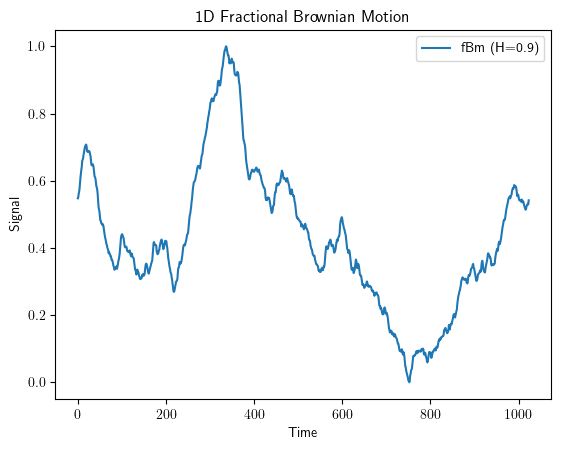

In [246]:
# this is adapted from The Science of Fractal Images, Springer-Verlag, 1988, page 108

def fractional_brownian_motion_1d(N, H, seed=None):
    """Generate a 1D fractional Brownian motion (fBm) using the spectral method."""
    if seed is not None:
        np.random.seed(seed)
    
    # Frequency domain (Fourier space)
    freqs = np.fft.rfftfreq(N)  # Only positive frequencies
    S = np.zeros_like(freqs)
    
    # Power spectrum: S(f) ~ |f|^(-2H-1)
    with np.errstate(divide='ignore', invalid='ignore'):
        S[1:] = freqs[1:] ** (-(2 * H + 1))
    
    S[0] = 0  # DC component should be zero to remove the mean drift
    
    # Generate Gaussian noise with correct magnitude
    real_part = np.random.normal(0, np.sqrt(S / 2), len(S))
    imag_part = np.random.normal(0, np.sqrt(S / 2), len(S))
    imag_part[-1] = 0  # Ensure real-valued inverse FFT
    F = real_part + 1j * imag_part

    # Mirror frequencies for inverse FFT
    F_full = np.concatenate([F, np.conj(F[-2:0:-1])])
    
    # Inverse FFT to obtain time-domain signal
    fBm = np.fft.ifft(F_full).real
    
    # Normalize to unit variance
    fBm -= fBm.min()
    fBm /= fBm.max()
    
    return fBm

# Parameters
N = 1024  # Number of points
H = 0.9   # Hurst parameter
seed = 42  # Random seed for reproducibility

# Generate and plot fBm
fBm_signal = fractional_brownian_motion_1d(N, H, seed)
plt.plot(fBm_signal, label=f'fBm (H={H})')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.title("1D Fractional Brownian Motion")
plt.legend()
plt.show()


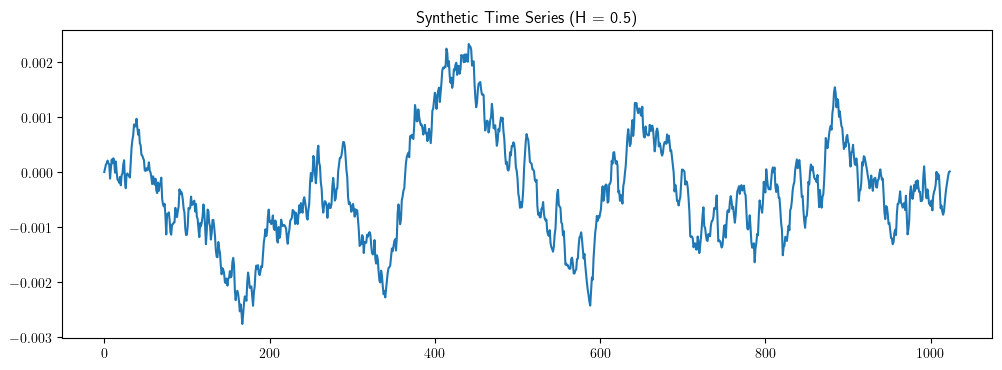

In [349]:
def spectral_synthesis(N, H, seed=None):
    """
    Spectral Synthesis Method for generating fractional Brownian motion
    
    Parameters:
    N: Number of points in the time series
    H: Hurst exponent
    seed: Random seed for reproducibility
    """
    # Set random seed if provided
    if seed is not None:
        np.random.seed(seed)
    
    # Calculate spectral slope
    beta = 2 * H + 1
    
    # Initialize arrays for real and imaginary parts
    A = np.zeros(N//2)
    B = np.zeros(N//2)
    
    # Generate Fourier coefficients
    for i in range(N//2):
        # Radial component with power-law decay
        rad = np.power(i+1, -beta/2) * np.random.randn()
        
        # Random phase
        phase = 2 * np.pi * np.random.rand()
        
        # Real and imaginary components
        A[i] = rad * np.cos(phase)
        B[i] = rad * np.sin(phase)
    
    # Inverse FFT to get time series
    # Combine real and imaginary parts
    X = np.fft.irfft(A + 1j*B, n=N)
    
    return X

# Example usage
N = 1024  # Number of points
H = 0.5   # Hurst exponent
time_series = spectral_synthesis(N, H)

# Visualization
plt.figure(figsize=(12,4))
plt.plot(time_series)
plt.title(f'Synthetic Time Series (H = {H})')
plt.show()

/tmp/ipykernel_24296/2299195824.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fig.suptitle(f"Real Hurst: {H}\nSlope (m): {round(float(model.coef_),3)}; Estimated Hurst: {round(float(Hurst),2)}")

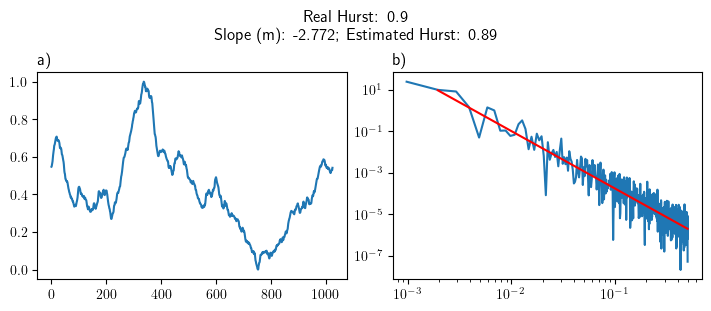

In [247]:
def tspowerplot(data):
    fig, ax = plt.subplots(1,2, constrained_layout=True, figsize=(7,3))
    ax[0].plot(data)
    ax[0].set_title("a)", loc='left')

    freq, power = signal.periodogram(data, 1)
    power = power[1:]
    freq = freq[1:]

    log_power = np.log10(power)
    log_freq = np.log10(freq)
    log_power = log_power[1:]
    log_freq = log_freq[1:]

    model = LinearRegression()
    model.fit(log_freq.reshape(-1,1), log_power)
    predicted_power = 10**model.predict(log_freq.reshape(-1,1))
    beta = model.coef_*-1
    if beta < 1:
        Hurst = (beta+1)/2
    else:
        Hurst = (beta-1)/2

    ax[1].plot(freq.reshape(-1,1), power)
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].plot(freq[1:].reshape(-1,1), predicted_power, color='red')
    ax[1].set_title("b)", loc='left')

    fig.suptitle(f"Real Hurst: {H}\nSlope (m): {round(float(model.coef_),3)}; Estimated Hurst: {round(float(Hurst),2)}")

tspowerplot(fBm_signal)
plt.show()

/tmp/ipykernel_24296/2299195824.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fig.suptitle(f"Real Hurst: {H}\nSlope (m): {round(float(model.coef_),3)}; Estimated Hurst: {round(float(Hurst),2)}")

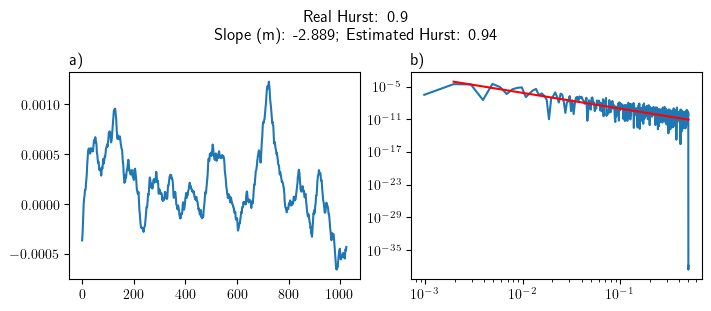

In [271]:
tspowerplot(time_series)
plt.show()

In [379]:
from scipy.stats import binom
from scipy.fftpack import fft
import statsmodels.api as sm
from stochastic.processes.noise import FractionalGaussianNoise as fgn
from stochastic.processes.continuous import FractionalBrownianMotion as fbm
%matplotlib inline

def linreg_weber(x, y, **kwargs):
    # performs linear regression (OLS) and returns slope, R, residuals and predicted y values
    
    # Set default min and max values for x
    xMin = np.min(x)
    xMax = np.max(x)

    # Handle optional xmin and xmax (here expected frequencies)
    # The below looks weird, as xMin = max and xMax = min, but it is just ensuring that the xmin and xmax you give are actually larger and smaller (respectively) than the absolute min and max
    if 'freqmin' in kwargs:
        xMin = max(xMin, kwargs['freqmin'])
    if 'freqmax' in kwargs:
        xMax = min(xMax, kwargs['freqmax'])

    # Get indices for the specified xMin and xMax range
    xMinInd = np.where(x >= xMin)[0][0] # will return an array of all values larger or equal then min, and pick the first
    xMaxInd = np.where(x <= xMax)[0][-1] # will return an array of all values smaller or equal then max, and pick the last

    # Slice x and y arrays to focus on the relevant range
    x_range = x[xMinInd:xMaxInd + 1]
    y_range = y[xMinInd:xMaxInd + 1] # note, I have tested this and it is correct

    # Perform linear regression
    X = sm.add_constant(x_range)  # Add constant (intercept)
    model = sm.OLS(y_range, X).fit() # Ordinary Least Squares

    # Calculate correlation coefficient (R value)
    R = np.corrcoef(x_range, y_range)[0, 1]

    # Get the slope from the model coefficients
    slope = model.params[1]

    # Calculate residuals (errors)
    residuals = model.resid

    # Fitted values (predicted y values)
    y_fitted = model.fittedvalues

    return slope, R, residuals, y_fitted
def spec_weber(ts, sf):
    L = len(ts) # length of time-series
    
    # Perform FFT
    Y = fft(ts) # fast fourier
    Pyy = np.abs(Y) ** 2 / L # square of absolute divided by length
    power = Pyy[:L // 2]  # Keep first half of spectrum

    freq = sf / L * np.arange(1, L // 2 + 1) # Create frequencies from sampling rate (sf)

    # Perform log transformation
    lgPyy = np.log(power)
    lgfreq = np.log(freq)

    # Perform linear regression on log-log data
    slope, R, residuals, y_fitted = linreg_weber(lgfreq, lgPyy)

    if -slope < 1:  # fGn case
        Hurst = (-slope + 1) / 2
    elif -slope > 1:  # fBm case
        Hurst = (-slope - 1) / 2
    elif -slope == 1:  # Unknown case
        Hurst = 0 # might as well, not sure what else to set it to: Nan? Inf?
    return freq, power, Hurst, slope, R, residuals, y_fitted
def Bridge(ts):
    '''This function bridge detrends the signal input ts
    The function subtracts a line connecting the first and last points from the signal'''
    n = len(ts)
    #points is the length of the time series from n-1 to 0 (backwards i.e. n-1, n-2,...0)
    points = np.arange(n-1, -1, -1).reshape(1,n)
    #line is a straight line connecting first and last point
    line = ((ts[0]-ts[n-1])*points/(n-1))+ts[n-1]
    line = line.transpose() #transposes line from row to column array
    #subtract line from time series to return bridge detrended signal (result)
    result = ts - np.transpose(line)
    return result 
def Window(ts):
    '''This function applies a parabolic window to the signal input'''
    n = len(ts) #n is length of time series
    W = np.zeros(n) #initialize empty array
    #create parabola from 0 to length n
    for j in np.arange(n):
        W[j] = 1 - np.power((2*(j + 1)/(n+1)-1),2)
    #multiply parabola and signal to get windowed signal (result)
    result = ts * W 
    return result

def pfgncalc_weber(logfreq, logpower, sf, hurst, ftype, Nsize, **kwargs):
    # Default parameters
    logfreqmin = np.min(logfreq)
    logfreqmax = np.max(logfreq)
    nSamples = 500
    pCrit = 0.05
    likelihood = 1e-3 #f there's less than a 0.1% chance that continuing the simulations would change whether p exceeds pCrit, the function terminates early

    # Handle optional parameters
    for key, value in kwargs.items():
        if key == 'freqmin':
            logfreqmin = value
        elif key == 'freqmax':
            logfreqmax = value
        elif key == 'samples':
            nSamples = value
        elif key == 'threshold':
            pCrit = value
        elif key == 'likelihood':
            likelihood = value

    # Calculate the Kolmogorov-Smirnov statistic for the empirical data
    _, _, residuals, _ = linreg_weber(logfreq, logpower, freqmin=logfreqmin, freqmax=logfreqmax)

    empiricalKS = np.max(np.abs(residuals))

    # Store Kolmogorov-Smirnov statistic
    ks = [empiricalKS, np.zeros(nSamples)]

    # Compute p-value
    successCounts = np.zeros(nSamples)
    nSuccesses = 0
    thisLikelihood = 1
    binomialFlag = True
    criticalThreshold = nSamples * pCrit

    samplebeta = np.zeros(nSamples)

    for iSample in range(nSamples):
        if thisLikelihood <= likelihood or not binomialFlag:
            break

        if ftype == 1:
            # Generate sample data based on Hurst
            #fgnsample = fgn(fsd, hurst, 1, Nsize, 0)
            fgnsample = fgn(hurst=hurst, t=1)
            fsample = fgnsample.sample(Nsize)
        elif ftype == 2:
            fbmsample = fbm(hurst=hurst, t=1)
            fsample = fbmsample.sample(Nsize)

        # Calculate power spectrum for the sample data
        _, powersample, _, _, _, _, _ = spec_weber(fsample, sf)
        logpowersample = np.log(powersample)

        # Perform linear regression on log-log data of sample
        thisbeta, _, theseresiduals, _ = linreg_weber(logfreq, logpowersample, freqmin=logfreqmin, freqmax=logfreqmax)

        if pCrit == 1:
            samplebeta[iSample] = -thisbeta

        # Calculate the KS statistic for simulated data
        sampleKS = np.max(np.abs(theseresiduals))

        # Store sample KS
        ks[1][iSample] = sampleKS

        # Record a success if the empirical KS is bounded above by the sample KS
        if empiricalKS <= sampleKS:
            successCounts[iSample] = 1
            nSuccesses += 1

        # Stop if success count reaches critical threshold
        if nSuccesses == criticalThreshold:
            binomialFlag = False

        # Update likelihood if pCrit != 1
        if pCrit != 1:
            thisLikelihood = 1 - binom.cdf(criticalThreshold - nSuccesses - 1, nSamples - iSample, pCrit)

    # Calculate p-value
    p = np.sum(successCounts) / nSamples

    # Compute standard deviation of beta if enough samples were processed
    if iSample == nSamples:
        sigmabeta = np.std(samplebeta)
    else:
        sigmabeta = np.nan

    return p, ks, sigmabeta

def plparams_weber(timeseries, samplingfreq, **kwargs):

    # If all values in the time-series are the same, end the program and return all zeroes
    if np.unique(timeseries).size == 1:
        Hurst, ftype, beta, freqmin, freqmax, sigmabeta, p, pCrit, ks = 0, 0, 0, 0, 0, 0, 0, 0, 0
        print("Timeseries values are all the same. Returning all measures as 0")
        return Hurst, ftype, beta, freqmin, freqmax, sigmabeta, p, pCrit, ks

    #default parameters
    nSamples=500
    #pCrit=0.2
    pCrit=0.05
    likelihood=1e-3
    finalplotFlag=False
    saveintermplotsFlag=False
    
    # Handle optional parameters
    for key, value in kwargs.items():
        if key == 'nSamples':
            nSamples = value
        elif key == 'pCrit':
            pCrit = value
        elif key == 'likelihood':
            likelihood = value
        elif key == 'finalplot':
            finalplotFlag = True
        elif key == 'saveintermplots':
            saveintermplotsFlag = True
    
    Nsize = len(timeseries)

    ### Hopefully this removes any scanner drift without really affecting the signal or the signal categorization
    timeseries = np.squeeze(Bridge(Window(signal.detrend(timeseries)))) # Bridge detrend (won't affect if it is already performed) and reduce dimensions

    freq, power, _, _, _, _, _ = spec_weber(timeseries, samplingfreq)

    # Find combinations of freqmin and freqmax that are two decades apart
    n = len(freq)
    combinations = []

    for i in range(n):
        highfreqs = np.where(freq >= 100 * freq[i])[0]
        for j in highfreqs:
            combinations.append([freq[i], freq[j]])

    combinations = np.array(combinations)

    idx = np.argsort(-combinations[:, 1])  # Negate for descending sort

    # Rearrange the combinations using the sorted indices
    combinations = combinations[idx]
    temp = combinations[0].copy()  # Copy to prevent unintended reference issues
    combinations[0] = combinations[1]
    combinations[1] = temp

    # Initiate greedy search for optimal support
    sweepFlag = True
    icombination = 0
    ncombinations = len(combinations)

    while sweepFlag and icombination < ncombinations:
        freqmin, freqmax = combinations[icombination]
        print(f"Current support pair is {icombination + 1} of {ncombinations}: {freqmin} to {freqmax}")

        log_freq = np.log(freq)
        log_power = np.log(power)
        beta, R, _, fittedvalues = linreg_weber(log_freq, log_power, freqmin=np.log(freqmin), freqmax=np.log(freqmax))
        print(f"R is {R}")
        beta = -beta
        print(f"beta is {beta}")

        if 0 <= beta < 1:
            print("Beta is between 0 and 1. Signal is estimated to be fGn")
            Hurst = (beta + 1) / 2
            ftype = 1
        elif beta > 1:
            print("Beta is greater than 1. Signal is estimated to be fBm")
            Hurst = (beta - 1) / 2
            ftype = 2
        else:
            print("Signal is unknown")
            Hurst = 0 # might as well, not sure what else to set it to. Nan?
            ftype = 0
            saveintermplotsFlag = False

       # if saveintermplotsFlag:

        if Hurst == 0:
            print("Hurst can not be defined. Ending program")
            return 0, 0, 0, 0, 0, 0, 0, 0, 0
        else:
            print(f"Hurst is estimated to be {Hurst}")

        p, _, _ = pfgncalc_weber(log_freq, log_power, samplingfreq, Hurst, ftype, Nsize, freqmin=np.log(freqmin), freqmax=np.log(freqmax), nSamples=nSamples, pCrit=pCrit, likelihood=likelihood)
        print(f"The p-value was found to be: {p}")

        if p >= pCrit:
            sweepFlag = False
        else:
            icombination += 1

    #print("Calculating final p, ks and sigmabeta")
    p, ks, sigmabeta = pfgncalc_weber(log_freq, log_power, samplingfreq, Hurst, ftype, Nsize, freqmin=np.log(freqmin), freqmax=np.log(freqmax), nSamples=nSamples, pCrit=pCrit, likelihood=likelihood)
    #print(f"min and max freq were found to be: {freqmin} and {freqmax}")
    if p >= pCrit:
        print(f"""
        final Hurst and ftype were found to be: {round(Hurst,2)} and {ftype}\\
        where 1 = fGn; and 2 = fBm\\
        final fmin and fmax are: {freqmin} and {freqmax}, respectively
        """)
    else:
        print("Hurst can not be defined. Ending program")

    if finalplotFlag:
        plt.figure()
        plt.scatter(freq, power, color='red', s=20)
        plt.plot(freq[(freq >= freqmin) & (freq <= freqmax)], np.exp(fittedvalues), 'k')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('logfreq')
        plt.ylabel('logpower')
        plt.title('loglog Power Frequency')
        plt.grid(True)
        plt.show()


    return Hurst, ftype, beta, freqmin, freqmax, sigmabeta, p, pCrit, ks

Current support pair is 1 of 1065: 0.001953125 to 0.5
R is -0.8574247916114793
beta is 2.7852828614014515
Beta is greater than 1. Signal is estimated to be fBm
Hurst is estimated to be 0.8926414307007258
The p-value was found to be: 0.022
Current support pair is 2 of 1065: 0.0048828125 to 0.5
R is -0.8417141074533928
beta is 2.762894995753699
Beta is greater than 1. Signal is estimated to be fBm
Hurst is estimated to be 0.8814474978768494
The p-value was found to be: 0.024
Current support pair is 3 of 1065: 0.0009765625 to 0.5
R is -0.8571529580468066
beta is 2.7289886364614677
Beta is greater than 1. Signal is estimated to be fBm
Hurst is estimated to be 0.8644943182307339
The p-value was found to be: 0.012
Current support pair is 4 of 1065: 0.0029296875 to 0.5
R is -0.8532642694878813
beta is 2.7978775702989087
Beta is greater than 1. Signal is estimated to be fBm
Hurst is estimated to be 0.8989387851494544
The p-value was found to be: 0.038
Current support pair is 5 of 1065: 0.00390

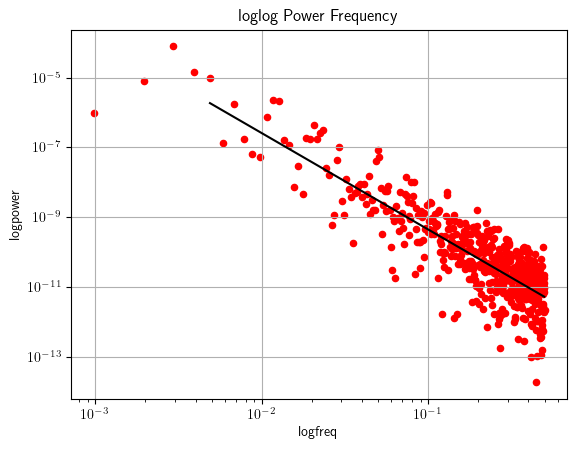

In [380]:
#time_series = spectral_synthesis(1024, 0.9)
hurst=0.7
Nsize=1024
fbmtestsample = fbm(hurst=hurst, t=1)
fbmtestsample = fbmtestsample.sample(Nsize)
Hurst, ftype, beta, freqmin, freqmax, sigmabeta, p, pCrit, ks = plparams_weber(time_series,1,finalplot=True)

In [406]:
from scipy.signal import lfilter
from scipy import signal

test_signals = {
    "Sinusoid": np.sin(2 * np.pi * 5 * np.linspace(0, 10, Nsize)),
}

for name, signals in test_signals.items():
    print(f"\nTesting: {name}")
    try:
        results = plparams_weber(signals, 1, finalplot=True)
        print(f"Results: {results}")
    except ValueError as e:
        print(f"Failed as expected: {e}")


Testing: Sinusoid
Current support pair is 1 of 1065: 0.001953125 to 0.5
R is -0.8389971902408805
beta is 4.29907093408593
Beta is greater than 1. Signal is estimated to be fBm
Hurst is estimated to be 1.649535467042965
Failed as expected: Hurst value must be in interval (0,1).

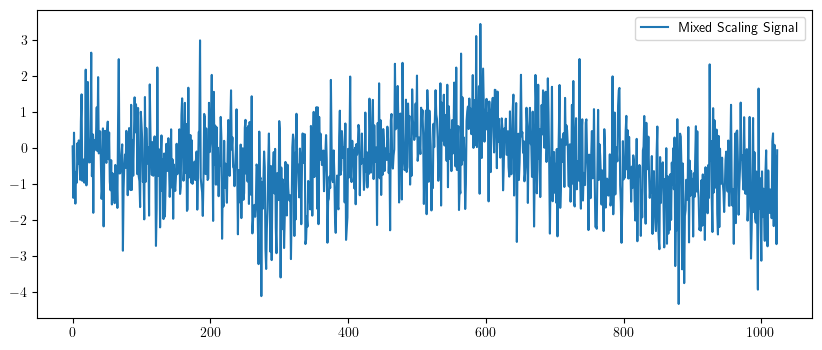

In [411]:
from scipy.signal import butter, filtfilt
def bandpass_filter(signal, fs, lowcut, highcut, order=5):
    """Applies a bandpass filter to retain only the desired frequency range."""
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Parameters
N = 1024  # Number of points
fs = 1    # Sampling frequency
hurst = 0.7  # Hurst parameter for scaling range

# 1. Generate scale-invariant (power-law) noise in the middle range
fbm_signal = fbm(hurst=hurst, t=1)
fbm_signal = fbm_signal.sample(Nsize)

# 2. Add white noise at high frequencies
white_noise = np.random.normal(0, 1, N)

# 3. Add low-frequency drift (trend)
low_freq_trend = np.cumsum(np.random.normal(0, 0.05, N))

# 4. Apply bandpass filter to isolate power-law scaling in a frequency band
filtered_fbm = bandpass_filter(fbm_signal, fs, lowcut=0.05, highcut=0.3)

# 5. Combine all components
test_signal = filtered_fbm[1:] + white_noise + low_freq_trend

# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(test_signal, label="Mixed Scaling Signal")
plt.legend()
plt.show()

Current support pair is 1 of 1065: 0.001953125 to 0.5
R is -0.10171080119157111
beta is 0.14335106730660838
Beta is between 0 and 1. Signal is estimated to be fGn
Hurst is estimated to be 0.5716755336533041
The p-value was found to be: 0.05

        final Hurst and ftype were found to be: 0.57 and 1\
        where 1 = fGn; and 2 = fBm\
        final fmin and fmax are: 0.001953125 and 0.5, respectively
        

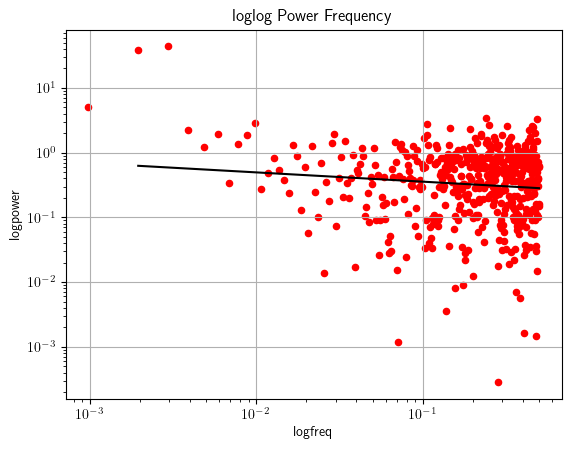

Results: (np.float64(0.5716755336533041), 1, np.float64(0.14335106730660838), np.float64(0.001953125), np.float64(0.5), nan, np.float64(0.05), 0.05, [np.float64(6.990815571360313), array([ 7.89172531,  6.49737403,  5.68118026,  7.86690093,  6.96439008,
        6.55223895,  6.20327911,  4.50313444,  4.00446681,  6.28834949,
        4.68179781,  6.51616319,  5.21742891,  4.60386353,  5.7412807 ,
        9.8865823 ,  6.50715223,  4.23890729,  7.76143263,  9.27164758,
        6.84451782,  4.85862844,  4.3036136 ,  6.25936068,  6.50129606,
        7.74249629,  6.07451734,  4.29409213,  7.37479191,  8.87931512,
        8.09025576,  6.15303747,  5.711248  ,  5.54702655,  5.13943953,
        8.88358343,  7.30254343,  6.96635362,  5.61441489,  5.00768701,
        6.32846249,  7.16622669,  5.06373142,  6.05361087,  6.73476941,
        6.73600108,  5.00839292,  8.09686541,  6.18819748,  5.69259099,
        6.50923116,  5.63557175,  5.72221459,  7.93671041, 10.70391616,
        9.58981926,  8.7905

In [412]:
results = plparams_weber(test_signal, 1, finalplot=True)
print(f"Results: {results}")